In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [3]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [4]:
import datetime
import time
import pandas as pd

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        if ts.year < 1970 or ts.year > 2038:
            timestamp.append('Out of Range')
        else:
            timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        timestamp.append('ValueError')

timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data[data['Timestamp'] != 'ValueError']
final_data = final_data[final_data['Timestamp'] != 'Out of Range']
final_data = final_data.drop(['Date', 'Time'], axis=1)
final_data.head()


,Latitude,Longitude,Depth,Magnitude,Timestamp
1456,-29.400,-177.169,35.0,5.6,42060.0
1457,24.185,102.543,11.3,7.1,300641.0
1458,23.984,102.732,15.0,5.9,368350.0
1459,-9.583,151.493,15.0,6.3,432354.0
1460,15.785,-59.808,36.7,6.0,527174.0


Enter longitude (or 'done' to finish): 25
Enter latitude: 25
Enter longitude (or 'done' to finish): 25
Enter latitude: 25
Enter longitude (or 'done' to finish): 25
Enter latitude: 25
Enter longitude (or 'done' to finish): 25
Enter latitude: 25
Enter longitude (or 'done' to finish): done


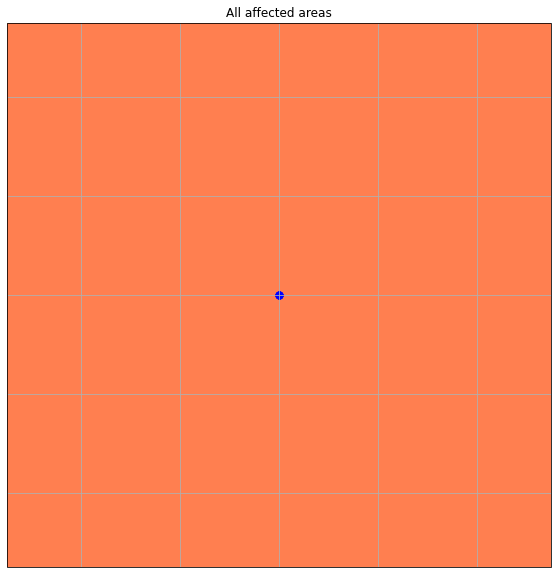

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Function to get longitude and latitude data from user
def get_coordinates_from_user():
    longitude = []
    latitude = []
    
    while True:
        lon = input("Enter longitude (or 'done' to finish): ")
        if lon.lower() == 'done':
            break
        lat = input("Enter latitude: ")
        try:
            longitude.append(float(lon))
            latitude.append(float(lat))
        except ValueError:
            print("Invalid input. Please enter numerical values.")

    return longitude, latitude

# Get user input
longitudes, latitudes = get_coordinates_from_user()

# Create a Cartopy map
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_title("All affected areas")

# Plot points
ax.scatter(longitudes, latitudes, color='blue', s=50, transform=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cfeature.LAND, color='coral')
ax.add_feature(cfeature.OCEAN, color='aqua')
ax.gridlines()

plt.show()


In [8]:
from sklearn.model_selection import train_test_split

X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17562, 3) (4391, 3) (17562, 2) (4391, 2)


In [9]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [10]:
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=1, activation='relu', optimizer='adam', loss='sparse_categorical_crossentropy'):
    # Define your model architecture here
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neurons, input_dim=20, activation=activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid
neurons = [16]
batch_size = [10]
epochs = [10]
activation = ['sigmoid', 'relu']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(model__neurons=neurons, batch_size=batch_size, epochs=epochs, model__activation=activation, model__optimizer=optimizer, model__loss=loss)

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Assuming X_train and y_train are your training data and labels
# grid_result = grid.fit(X_train, y_train)


In [11]:
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=1, activation='relu', optimizer='adam', loss='sparse_categorical_crossentropy'):
    # Define your model architecture here
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neurons, input_dim=20, activation=activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid
neurons = [16]
batch_size = [10]
epochs = [10]
activation = ['sigmoid', 'relu']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(model__neurons=neurons, batch_size=batch_size, epochs=epochs, model__activation=activation, model__optimizer=optimizer, model__loss=loss)

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Assuming X_train and y_train are your training data and labels
# grid_result = grid.fit(X_train, y_train)


In [12]:
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Sample data creation for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model creation function
def create_model(neurons=1, activation='relu', optimizer='adam', loss='sparse_categorical_crossentropy'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model using scikeras' KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid
neurons = [16]
batch_size = [10]
epochs = [10]
activation = ['sigmoid', 'relu']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(
    model__neurons=neurons, 
    batch_size=batch_size, 
    epochs=epochs, 
    model__activation=activation, 
    model__optimizer=optimizer, 
    model__loss=loss
)

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search
grid_result = grid.fit(X_train, y_train)

# Print the best result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\91897\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.737485 using {'batch_size': 10, 'epochs': 10, 'model__activation': 'relu', 'model__loss': 'squared_hinge', 'model__neurons': 16, 'model__optimizer': 'SGD'}
0.508748 (0.000870) with: {'batch_size': 10, 'epochs': 10, 'model__activation': 'sigmoid', 'model__loss': 'squared_hinge', 'model__neurons': 16, 'model__optimizer': 'SGD'}
0.479987 (0.008466) with: {'batch_size': 10, 'epochs': 10, 'model__activation': 'sigmoid', 'model__loss': 'squared_hinge', 'model__neurons': 16, 'model__optimizer': 'Adadelta'}
0.737485 (0.033197) with: {'batch_size': 10, 'epochs': 10, 'model__activation': 'relu', 'model__loss': 'squared_hinge', 'model__neurons': 16, 'model__optimizer': 'SGD'}
0.426253 (0.016899) with: {'batch_size': 10, 'epochs': 10, 'model__activation': 'relu', 'model__loss': 'squared_hinge', 'model__neurons': 16, 'model__optimizer': 'Adadelta'}


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sample data creation for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the labels to one-hot encoding for compatibility with softmax output
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

# Define the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model with categorical_crossentropy
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


Epoch 1/20


C:\Users\91897\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5963 - loss: 0.6649 - val_accuracy: 0.7000 - val_loss: 0.6040
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.7846 - loss: 0.5855 - val_accuracy: 0.8300 - val_loss: 0.5321
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8469 - loss: 0.5110 - val_accuracy: 0.8350 - val_loss: 0.4678
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8756 - loss: 0.4294 - val_accuracy: 0.8350 - val_loss: 0.4191
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.8765 - loss: 0.3886 - val_accuracy: 0.8450 - val_loss: 0.3837
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.8544 - loss: 0.3662 - val_accuracy: 0.8450 - val_loss: 0.3622
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8470 - loss: 0.3554 - val_accuracy: 0.8500 - val_loss: 0.3510
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8710 - loss: 0.3321 - val_accuracy: 0.8550 - val_lo